In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [0]:
# KNN k-nearest neighbors

# k 최근접 이웃 알고리즘
# 머신러닝 분류에 자주 사용되는 대표 알고리즘
# 얼굴인식, 개인영화추천, 질병 유전자 패턴 식별에 활용

# KNN의 K는 가장 가까운 이웃 '하나' 가 아니고
# 훈련 데이터 중 새로운 데이터와 가장 가까운
# k개의 이웃을 찾는 다는 의미

# 즉, 하나의 관측값은 거리가 가까운 k개의 
# 이웃 관측값들과 비슷한 특성을 갖는다고 가정함

# 따라서, k개의 이웃의 목표변수 중 다수결로
# 가장 많은 범주에 속한 값을 결과로 반환

# KNN 알고리즘에서는 k를 얼마로 설정하느냐에 따라
# 결과와 성능이 달라짐

# k 가 작으면 데이터의 범위가 좁아짐 - 과적합 위험
# k 가 크면 데이터의 범위가 넓어짐 - 일반화 위험

# 일반적으로 k값은 데이터의 건수에 제곱근을 씌운 값


In [0]:
# iris 데이터셋을 knn으로 분석하기

# 데이터 적재
iris = load_iris()


# 데이터 시각화 - 산점도 행렬
df = pd.DataFrame(iris.data, columns=iris.feature_names)

pd.plotting.scatter_matrix(df, c=iris.target, marker='o', s=15, alpha=.8)
plt.show()


# 데이터 분할
X_train, X_test, y_train, y_test = \
train_test_split(iris.data, iris.target, random_state=1907101430)


# knn 분석 1
knn = KNeighborsClassifier(n_neighbors=1)
# k 값은 1로 설정 (기본값 5)

knn.fit(X_train, y_train)
print('훈련정확도', knn.score(X_train, y_train))


# 예측하기 
new_x = np.array([[5, 2.9, 1, 0.2]])
pred = knn.predict(new_x)

iris.target_names[pred]   # 예측결과 레이블 출력


# 평가하기
pred = knn.predict(X_test)
print('검증정확도', knn.score(X_test, y_test))


In [21]:
# knn 분석 2
knn = KNeighborsClassifier(n_neighbors=3)
# k 값은 1로 설정 (기본값 3)

knn.fit(X_train, y_train)
print('훈련정확도', knn.score(X_train, y_train))


# 예측하기 
new_x = np.array([[5, 2.9, 1, 0.2]])
pred = knn.predict(new_x)

iris.target_names[pred]   # 예측결과 레이블 출력
# => setosa


# 평가하기
pred = knn.predict(X_test)
print('검증정확도', knn.score(X_test, y_test))


훈련정확도 0.9732142857142857
검증정확도 0.9210526315789473


In [22]:
# knn 분석 3
knn = KNeighborsClassifier(n_neighbors=5)
# k 값은 1로 설정 (기본값 5)

knn.fit(X_train, y_train)
print('훈련정확도', knn.score(X_train, y_train))


# 예측하기 
new_x = np.array([[5, 2.9, 1, 0.2]])
pred = knn.predict(new_x)

iris.target_names[pred]   # 예측결과 레이블 출력


# 평가하기
pred = knn.predict(X_test)
print('검증정확도', knn.score(X_test, y_test))


훈련정확도 0.9732142857142857
검증정확도 0.9473684210526315


In [0]:
# KNN 알고리즘 좀 더 살펴보기
# 가장 가까운 훈련데이터 k개를 최근접 이웃으로 찾아 예측에 사용함
# pip install mglearn

import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
이름     13 non-null object
3점     13 non-null int64
블로킹    13 non-null int64
포지션    13 non-null object
dtypes: int64(2), object(2)
memory usage: 496.0+ bytes


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


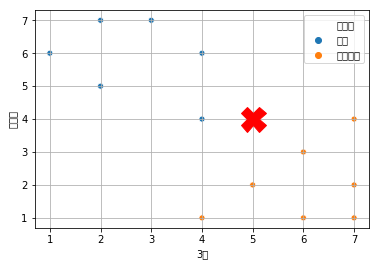

훈련정확도 1.0
훈련정확도 1.0
훈련정확도 1.0


array([1])

In [72]:
# 3점슛, 블록킹수에 따라 포지션이 결정됨
# 만일, 3점슛이 5, 블록킹수 4일 경우 포지션은?

basket = pd.read_csv('bb.txt', encoding='euc-kr')

basket.info()
basket.포지션.value_counts()


# 시각화
x = basket['3점']
y = basket.블로킹
z = basket.포지션

sns.scatterplot(x, y, hue=z)
plt.plot(5, 4, 'rX', markersize=25)
plt.grid('on')
plt.show()


# 데이터 분할
data = basket.iloc[:, 1:3]

basket['position'] = basket.포지션.map({'센터': 0, '슈팅가드': 1})
target = basket.position


# KNN 분석
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, target)
print('훈련정확도', knn.score(data, target))

knn.predict(np.array([[5, 4]]))
# => 0이 나오므로 센터


# KNN 분석
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, target)
print('훈련정확도', knn.score(data, target))

knn.predict(np.array([[5, 4]]))
# => 1이 나오므로 슈팅가드


# KNN 분석
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, target)
print('훈련정확도', knn.score(data, target))

knn.predict(np.array([[5, 4]]))
# => 1이 나오므로 슈팅가드